## Plot Solubility of CO2 in Glycerol

In our Zoom meeting on July 8, 2020, Julie suggested examining the effect of hydroxyl (-OH) concentration to its extremes, the upper end being glycerol, which is 3 hydroxyl groups connected on 3-carbon backbone. Data for solubility of CO2 in glycerol are available in the literature, so I plot those data here for comparison to CO2 solubility in polyols with lower hydroxyl groups. This will test our hypothesis that a higher hydroxyl count increases CO2 solubility, which was based on Prof. Di Maio's finding with Raman spectroscopy that CO2 and hydroxyl groups interact strongly when CO2 is dissolved in polyol.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import dataproc
import plot

from importlib import reload

reload(dataproc)
reload(plot)

# System parameters
# molecular weight of CO2
mw_co2 = 44.01
# conversion of m3 per mL
m3_per_mL = 1E-6
# Save plots?
save_plots = True
# file path to saved data
data_folder = '../g-adsa_results/'
# csv data files
csv_file_list = ['mg_92-3f_40c', 'mg_92-3f_60c', 'mg_92-3f_80c', 'mg_92-3f_100c',
                '1k2f_30c', '1k2f_60c', '1k3f_30c', '1k3f_60c'] #, 'nunes_92-3f_80c', 'nunes_92-3f_120c', 'nunes_92-3f_150c', ]
# folder of csv data files for DFT predictions of interfacial tension
dft_data_folder = 'dft_pred//'

Extract data from dataframes

In [50]:
d = dataproc.load_proc_data(csv_file_list, data_folder)

Plots data.

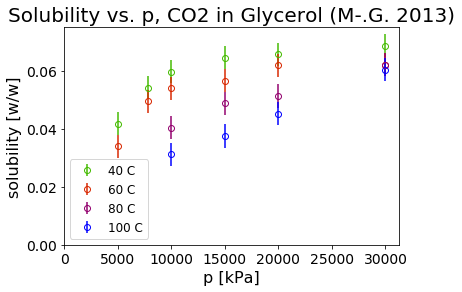

In [51]:
from matplotlib import cm

cmap = cm.get_cmap('brg')

T_list = [d[tag]['T'] for tag in csv_file_list]
T_min = np.min(T_list)
T_max = np.max(T_list)
ax = None
for tag in csv_file_list:
    if 'mg' not in tag:
        continue
    T = d[tag]['T']
    color = cmap((T_max - T)/(T_max - T_min))
    if ax is None:
        ax = plot.plot_errorbars(d[tag]['p'], d[tag]['solub'], d[tag]['s_solub'], 
                                        color=color, xlabel='p [kPa]',
                                        ylabel='solubility [w/w]', title='Solubility vs. p, CO2 in Glycerol (M-.G. 2013)',
                                        label='{0:d} C'.format(int(d[tag]['T'])))
    else:
        ax = plot.plot_errorbars(d[tag]['p'], d[tag]['solub'], d[tag]['s_solub'], 
                                color=color, ax=ax,
                                label='{0:d} C'.format(int(d[tag]['T'])))
ax.set_xlim([0, ax.get_xlim()[1]])
ax.set_ylim([0, ax.get_ylim()[1]])
plt.legend(fontsize=12)# save figure

# save figure
if save_plots:
    plt.savefig(data_folder + 'solub_mg_glyc.pdf', bbox_inches='tight')

## Compare to Other Polyols

Below, we plot solubilities of other polyols.

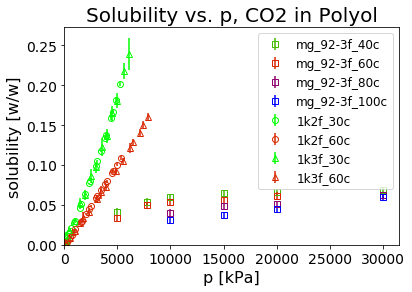

In [59]:
ax = None
d_marker = {'1k2f':'o', '1k3f':'^', 'mg_92-3f':'s'}
for tag in csv_file_list:
    T = d[tag]['T']
    color = cmap((T_max - T)/(T_max - T_min))
    marker = d_marker[d[tag]['polyol']]
    if ax is None:
        ax = plot.plot_errorbars(d[tag]['p'], d[tag]['solub'], d[tag]['s_solub'], 
                                        color=color, xlabel='p [kPa]', marker=marker,
                                        ylabel='solubility [w/w]', title='Solubility vs. p, CO2 in Polyol',
                                        label=tag)
    else:
        ax = plot.plot_errorbars(d[tag]['p'], d[tag]['solub'], d[tag]['s_solub'], 
                                color=color, ax=ax, marker=marker,
                                label=tag)
ax.set_xlim([0, ax.get_xlim()[1]])
ax.set_ylim([0, ax.get_ylim()[1]])
plt.legend(fontsize=12)# save figure

# save figure
if save_plots:
    plt.savefig(data_folder + 'solub_glyc_1k2f_1k3f.pdf', bbox_inches='tight')

The difference between 1k2f and 1k3f is very small, but clearly the solubility of CO2 in glycerol is significantly lower than the solubility of CO2 in polyether polyol, contradicting our hypothesis that the solubility of CO2 increases with hydroxyl concentration (since glycerol would have the highest hydroxyl concentration).